In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
sns.set_style('whitegrid')
%matplotlib inline

from scipy.stats import probplot,gaussian_kde

In [245]:
data = pd.read_csv('data/2006.csv');

In [246]:
data.Strokes_Gained.describe()

count    1.106521e+06
mean    -1.810071e-17
std      3.930964e-01
min     -2.602865e+00
25%     -2.217062e-01
50%      9.236921e-02
75%      2.116494e-01
max      3.240358e+00
Name: Strokes_Gained, dtype: float64

In [247]:
print_full(data.sort_values('Strokes_Gained',ascending=False).head(10))

        Year  Tourn.#  Player_#  Course_#  Permanent_Tournament_#  \
655475  2006      130     12602        11                      11   
518652  2006      330     25900        35                      35   
507893  2006      370     23135        36                     476   
624889  2006      190      7013       698                     480   
687290  2006      290     28780       669                      30   
549663  2006      190      1553       698                     480   
553380  2006      240     20572        27                      27   
563552  2006      190      1035       698                     480   
540593  2006       40     20229         4                       4   
551930  2006      240      1329        27                      27   

       Player_First_Name Player_Last_Name  Round  \
655475              Dean           Wilson      1   
518652             Lucas           Glover      1   
507893               Tim            Clark      1   
624889               Wes       S

In [153]:
data.head(50)

,Year,Tourn.#,Player_#,Course_#,Permanent_Tournament_#,Player_First_Name,Player_Last_Name,Round,Tournament_Name,Course_Name,...,Elevation,Shots_taken_from_location,Went_to_X,Went_to_Y,Went_to_Z,Started_at_X,Started_at_Y,Started_at_Z,Distance_from_hole,Strokes_Gained
0,2004,260,1098,512,24,Jay Don,Blake,4,Booz Allen Classic,TPC Avenel,...,With,10,576.487498,15.659753,10.812,1361.398895,-40.804968,NaN,1362.010278,-0.056363
1,2004,470,1024,45,45,Billy,Andrade,3,FUNAI Classic at the WALT DISNEY WORLD Resort,Magnolia GC,...,With,4,31.517677,435.235514,-3.965,-264.775950,1275.597480,NaN,1302.787486,0.056833
2,2004,180,12394,511,18,Tom,Carter,1,HP Classic of New Orleans,English Turn G&CC,...,With,4,-676.737714,280.156955,1.482,-1174.103029,959.802863,NaN,1516.489189,-0.112650
3,2004,430,11123,609,54,Chris,Couch,2,Southern Farm Bureau Classic,Annandale GC,...,With,4,-213.713915,681.712111,14.768,-593.882667,1543.499748,NaN,1653.810175,0.201861
4,2004,230,10944,23,23,Thomas,Bjorn,4,the Memorial Tournament,Muirfield Village GC,...,With,4,-427.871509,-131.798544,17.845,-1297.868409,49.372531,NaN,1298.807166,0.113910
5,2004,50,6567,5,5,Vijay,Singh,3,AT&T Pebble Beach National Pro-Am,Pebble Beach GL,...,With,4,-181.918209,48.645508,-10.681,-816.718215,414.916369,NaN,916.069996,0.356079
6,2004,230,1619,23,23,Skip,Kendall,1,the Memorial Tournament,Muirfield Village GC,...,With,4,213.142223,821.757299,-2.937,646.513710,1505.848010,NaN,1638.767282,-0.011165
7,2004,40,22548,510,3,Patrick,Sheehan,2,FBR Open,TPC Scottsdale,...,With,4,-112.764530,-1.880257,-5.045,-992.016684,59.368562,NaN,993.791592,0.088039
8,2004,440,20400,687,473,Michael,Campbell,4,World Golf Championships-American Express Cham...,Mount Juliet,...,With,4,409.298144,-354.868111,-6.629,985.189350,-805.529306,NaN,1272.586154,-0.151086
9,2004,430,10912,609,54,Craig,Perks,2,Southern Farm Bureau Classic,Annandale GC,...,With,4,-424.284151,-181.314000,-0.743,-1176.841649,-693.955373,NaN,1366.210206,0.182103


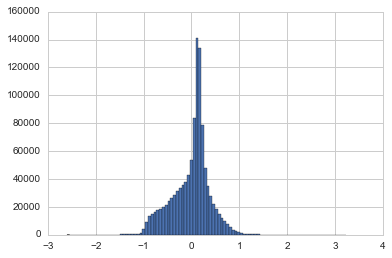

In [248]:
plt.hist(data.Strokes_Gained,bins=100);
# plt.xlim(-.3,.3);

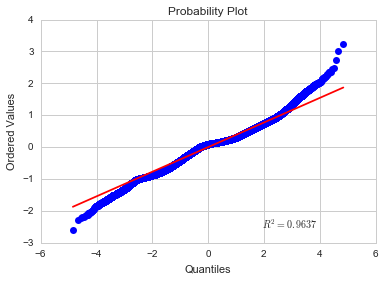

In [249]:
probplot(data.Strokes_Gained,plot=plt);

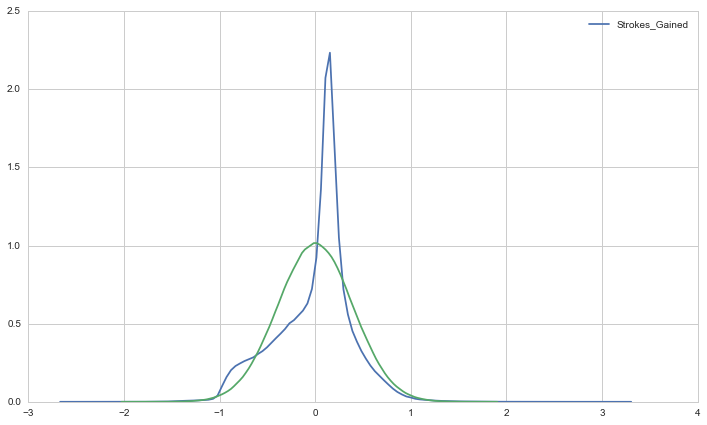

In [250]:
fig, ax = plt.subplots(figsize=(12,7))
sns.kdeplot(data.Strokes_Gained, bw='scott');
x = np.random.normal(data.Strokes_Gained.mean(),data.Strokes_Gained.std(),size=len(data))
sns.kdeplot(x,bw='scott');
#plt.xlim(1.9,2.3);

In [251]:
subset = data[(data['Course_Name']=='Pebble Beach GL') & 
              (data['Round']==4) & (data['Hole']==18)]

In [252]:
subset.shape

(290, 37)

In [253]:
def print_full(x):
    pd.set_option('display.max_columns', x.shape[1])
    print(x)
    pd.reset_option('display.max_columns')

In [254]:
print_full(subset[(subset['Player_#']==1326)])

Empty DataFrame
Columns: [Year, Tourn.#, Player_#, Course_#, Permanent_Tournament_#, Player_First_Name, Player_Last_Name, Round, Tournament_Name, Course_Name, Hole, Hole_Score, Par_Value, Yardage, Shot, Shot_Type(S/P/D), #_of_Strokes, From_Location(Scorer), From_Location(Enhanced), To_Location(Laser), To_Location(Enhanced), Distance, Distance_to_Pin, Around_the_Green_Flag, 1st_Putt_Flag, Distance_to_Hole_after_the_Shot, Time, Elevation, Shots_taken_from_location, Went_to_X, Went_to_Y, Went_to_Z, Started_at_X, Started_at_Y, Started_at_Z, Distance_from_hole, Strokes_Gained]
Index: []


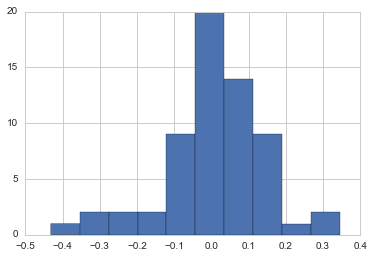

In [255]:
plt.hist(subset[subset.Shot==1].Strokes_Gained);

In [256]:
subset.Shots_taken_from_location.value_counts()

3    62
2    62
1    62
4    61
5    36
6     7
Name: Shots_taken_from_location, dtype: int64

[-1.1699999999999999, -1.04, -0.90000000000000002, -0.77000000000000002, -0.64000000000000001, -0.5, -0.37, -0.23000000000000001, -0.10000000000000001, 0.029999999999999999, 0.17000000000000001, 0.29999999999999999, 0.44, 0.56999999999999995, 0.70999999999999996, 0.83999999999999997, 0.96999999999999997, 1.1100000000000001, 1.24, 1.3799999999999999, 1.51]


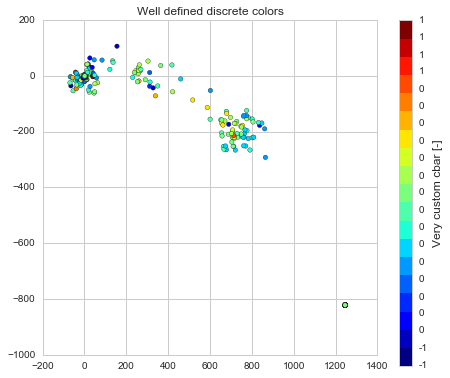

In [257]:
# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

# define the data
x,y,tag = subset.Started_at_X,subset.Started_at_Y,subset.Strokes_Gained

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(tag.min(),tag.max(),20)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,cmap=cmap, norm=norm)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
ticks = [np.round(i,2) for i in np.histogram(tag,bins=20)[1]]
print ticks
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=ticks, boundaries=bounds, format='%1i')

ax.set_title('Well defined discrete colors')
ax2.set_ylabel('Very custom cbar [-]', size=12);

In [258]:
def convert_cats(cat,dist):
    if cat in ['Green Side Bunker','Fairway Bunker']:
        return 'Bunker'
    elif cat not in ['Green','Fairway','Fringe','Primary Rough','Intermediate Rough','Tee Box']:
        return 'Other'
    elif cat=='Fringe' and dist>120:
        return 'Intermediate Rough'
    else:
        return cat

In [259]:
subset.insert(len(subset.columns),'Cat',[convert_cats(c,d) for c,d in zip(subset['From_Location(Scorer)'],subset['Distance_from_hole'])])

In [260]:
subset = subset[['Course_#','Round','Hole','Player_#','Hole_Score','Shot','Cat','Shots_taken_from_location',
            'Distance_from_hole','Started_at_X','Started_at_Y','Went_to_X','Went_to_Y','Year']].values

In [261]:
cats = ['Bunker','Other','Green','Fairway','Fringe','Primary Rough','Intermediate Rough']

In [262]:
players = pd.unique(subset[:,3])

In [263]:
scores = {player:int(subset[np.where(subset[:,3]==player)][0,4]) for player in players}
ave_score = np.mean(np.array([scores.get(player) for player in players]))

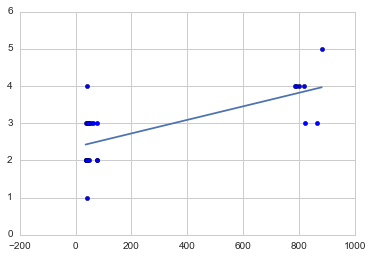

Bunker {'Bunker': 27}
Other {'Bunker': 27, 'Other': 1}


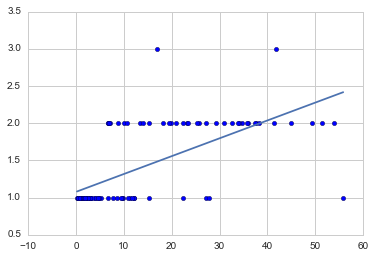

Green {'Bunker': 27, 'Other': 1, 'Green': 97}


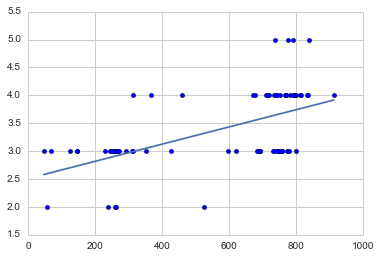

Fairway {'Fairway': 74, 'Bunker': 27, 'Other': 1, 'Green': 97}
Fringe {'Fairway': 74, 'Bunker': 27, 'Fringe': 1, 'Other': 1, 'Green': 97}


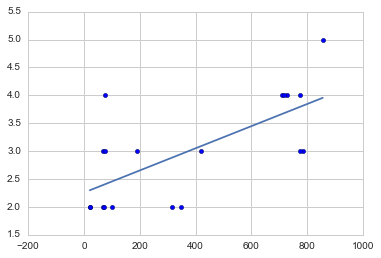

Primary Rough {'Primary Rough': 19, 'Fairway': 74, 'Fringe': 1, 'Other': 1, 'Green': 97, 'Bunker': 27}


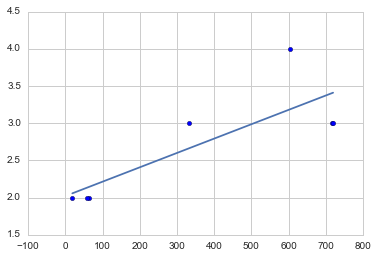

Intermediate Rough {'Primary Rough': 19, 'Fairway': 74, 'Fringe': 1, 'Intermediate Rough': 7, 'Other': 1, 'Green': 97, 'Bunker': 27}


/Users/adamlevin/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/adamlevin/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


NameError: name 'crhytup' is not defined

In [264]:
little_dict = {}
for player in players:
    sub = subset[np.where(subset[:,3]!=player)]
    #print len(sub)
    models = {}
    cat_count = {}
    for cat in cats:
        if len(sub[np.where(sub[:,6]==cat)])>6:
            models[cat] = LinearRegression()
            models[cat].fit(sub[np.where(sub[:,6]==cat)][:,8][:,None],sub[np.where(sub[:,6]==cat)][:,7])
            plt.scatter(sub[np.where(sub[:,6]==cat)][:,8],sub[np.where(sub[:,6]==cat)][:,7])
            plt.plot(np.sort(sub[np.where(sub[:,6]==cat)][:,8]),models[cat].predict(np.sort(sub[np.where(sub[:,6]==cat)][:,8])[:,None]))
            plt.show()
        cat_count[cat] = len(sub[np.where(sub[:,6]==cat)])
        print cat,cat_count
        

    just_dist_model = LinearRegression()
    just_dist_model.fit(sub[:,8][:,None],sub[:,7])

    sub = subset[np.where(subset[:,3]==player)]

    for row_ind in range(2,scores[player]+1):
        shot = sub[np.where(sub[:,5]==row_ind)]
        cat = shot[0,6]
        dist = shot[0,8]
        shot_before = sub[np.where(sub[:,5]==row_ind-1)]
        cat_before = shot_before[0,6]
        dist_before = shot_before[0,8]
        if row_ind==2:
            if cat_count[cat]<5 or np.isnan(models[cat].predict([dist])[0]):
                normal_cat_diff = overall_models[cat].predict([dist])[0] - overall_just_dist.predict([dist])[0]
                difficulty_end = just_dist_model.predict([dist])[0] + normal_cat_diff
            else:
                difficulty_end = models[cat].predict([dist])[0]
            little_dict[crhytup+(player,row_ind-1)] = ave_score - difficulty_end - 1
        else:
            if cat_count[cat]<5 or np.isnan(models[cat].predict([dist])[0]):
                normal_cat_diff = overall_models[cat].predict([dist])[0] - overall_just_dist.predict([dist])[0]
                difficulty_end = just_dist_model.predict([dist])[0] + normal_cat_diff
            else:
                difficulty_end = models[cat].predict([dist])[0]
            if cat_count[cat_before]<5 or np.isnan(models[cat_before].predict([dist_before])[0]):
                normal_cat_diff = overall_models[cat_before].predict([dist_before])[0] - overall_just_dist.predict([dist_before])[0]
                difficulty_start = just_dist_model.predict([dist_before])[0] + normal_cat_diff
            else:
                difficulty_start = models[cat_before].predict([dist_before])[0]

            little_dict[crhytup+(player,row_ind-1)] = difficulty_start - difficulty_end - 1

    cat_last = sub[np.where(sub[:,5]==scores[player])][0,6]
    dist_last = sub[np.where(sub[:,5]==scores[player])][0,8]
    if cat_count[cat_last]<5 or np.isnan(models[cat_last].predict([dist_last])[0]):
        normal_cat_diff = overall_models[cat_last].predict([dist_last])[0] - overall_just_dist.predict([dist_last])[0]
        difficulty_last = just_dist_model.predict([dist_last])[0] + normal_cat_diff
    else:
        difficulty_last = models[cat_last].predict([dist_last])[0]
    little_dict[crhytup+(player,scores[player])] = difficulty_last - 1

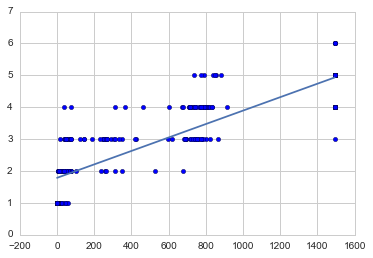

In [265]:
plt.scatter(subset[:,8],subset[:,7])
plt.plot(np.sort(subset[:,8]),just_dist_model.predict(np.sort(subset[:,8])[:,None]));